result2 1.0000000000000002
result3 0.13114793731323005
result a-b 0.09999999999999998
result b-c 0.9000000000000001
result a-c 0.9999999957547261


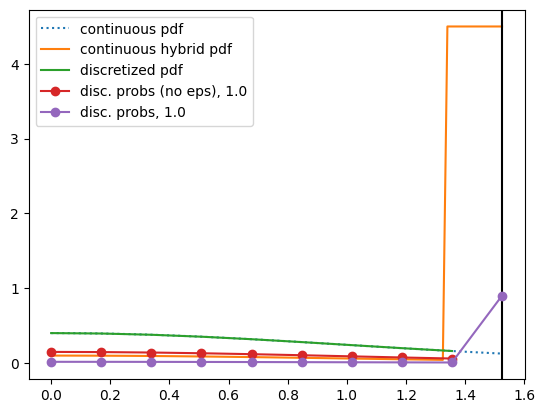

In [393]:
import numpy as np
from scipy.stats import truncnorm,uniform,norm
import matplotlib.pyplot as plt


def obtain_probability(self,t):

    U = np.sqrt( self.alpha  * np.log(t) ) 
    epsilon = 10e-7
    sigma = 1

    if np.random.uniform([0,1]) < epsilon:
        Z = U
    else:
        obj = truncnorm( a , b , loc=mu, scale=sigma).rvs(a, b, size=1000)
        Z = truncnorm( (0 - loc) / scale , (U - loc) / scale , loc=0, scale=sigma).rvs() 

    return Z


def obtain_probability(self,t):

    U = np.sqrt( self.alpha  * np.log(t) ) 
    epsilon = 10e-7
    sigma = 1
    
    rhos = list( np.arange(0, U, U / (K-1) ) )
    p_m_hat =  np.array( [ 1/np.sqrt(2*np.pi )*np.exp( -(rho**2) / (2*sigma**2)  ) for rho in rhos ] )
    rhos.append(U)

    p_m = (1 - epsilon) * p_m_hat / p_m_hat.sum()
    p_m = p_m.tolist()
    p_m.append(epsilon)

    Z = np.random.choice(rhos, p= p_m)

    return Z

# Set the mean and standard deviation of the Gaussian distribution

scale = 1
loc = 0

epsilon = 0.9
tho = 0.2

alpha = 1.01
t = 10
K = 10
U = np.sqrt( alpha  * np.log(t) ) 
myclip_a = 0
myclip_b = U - tho
myclip_c = U

x = np.linspace(a, c, 100)

### version continue

# pdf d'une gaussienne non tronquee
obj1 = norm( loc=mu, scale=sigma)
integrand1 = lambda x: obj1.pdf(x)
plt.plot(x, [integrand1(i) for i in x] , ':', label = 'continuous pdf ')

# pdf d'une gaussienne tronquee
obj2 = truncnorm( a , b , loc=mu, scale=sigma)
integrand2 = lambda x: obj2.pdf(x)
result2, error = quad(integrand2, a, b)

# pdf d'une uniforme
obj3 = uniform( b , c )
integrand3 = lambda x: obj3.pdf(x)
result3, error = quad(integrand3, b, c)

print('result2', result2)
print('result3', result3)
pdf = lambda x: (1 - epsilon) * obj2.pdf( x ) / result2  if x<=b else epsilon * integrand3(x) / result3


result4, error = quad(pdf, a, b)
result5, error = quad(pdf, b, c)
result6, error = quad(pdf, a, c)
print('result a-b',result4)
print('result b-c',result5)
print('result a-c',result6)

y = [pdf(i) for i in x]
plt.plot(x,y  , label = 'continuous hybrid pdf ')

plt.axvline(U, color = 'black')

### version discrete:

rhos = list( np.arange(0, U, U / (K-1) ) )
p_m_hat =  np.array( [ 1/np.sqrt(2*np.pi )*np.exp( -(rho**2) / (2*sigma**2)  ) for rho in rhos ] )
rhos.append(U)
plt.plot( rhos[:-1], p_m_hat, label = 'discretized pdf ')

p_m1 =  p_m_hat / p_m_hat.sum()
plt.plot( rhos[:-1], p_m1, 'o-' , label = 'disc. probs (no eps), {}'.format( np.round( sum(p_m1) ),2) )

p_m = (1 - epsilon) * p_m_hat / p_m_hat.sum()
p_m = p_m.tolist()
p_m.append(epsilon)
plt.plot( rhos, p_m, 'o-' , label = 'disc. probs, {}'.format( np.round(sum(p_m1)) ) )

# plt.ylim(0,0.3)
# plt.xlim(1.5,1.53)
plt.legend()
plt.show()

In [524]:
t = 10

def obtain_probability(t):

        U = np.sqrt( 1.01  * np.log(t) ) 
        mean = 0

        if np.random.uniform(0,1) < epsilon:
            Z = U
        else:
            Z = truncnorm( (0 - mean) / 1 , (U - mean) / 1 , loc=mean, scale=1).rvs() 

        return Z

obtain_probability(t)

1.060724334375421

In [426]:
scale = 10
a, b = (myclip_a - loc) / scale, (myclip_c - loc) / scale
print( truncnorm( 0 , U , loc=mu, scale=1).rvs() )
print(U)

0.07512489975708098
1.5249953914435237


result2 1.0
result3 0.5
result4 0.9999999999999999
[1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


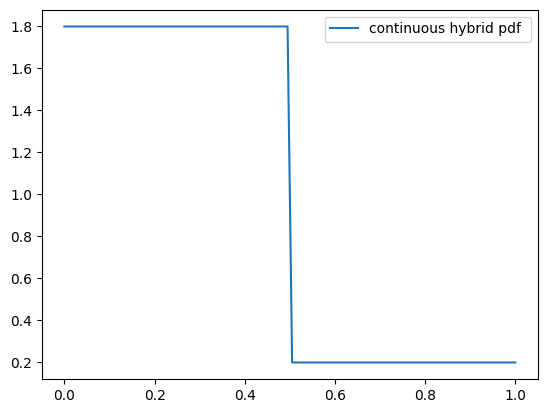

In [246]:
import numpy as np
from scipy.stats import truncnorm,uniform,norm
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the Gaussian distribution

epsilon = 0.1

tho = 0.5
a = 0
b = c - tho
c = 1

x = np.linspace(a, c, 100)

### version continue

# pdf d'une gaussienne tronquee
obj2 = uniform( a , b  )
integrand2 = lambda x: obj2.pdf(x)
result2, error = quad(integrand2, a, b)
print('result2', result2)

# pdf d'une uniforme
obj3 = uniform( b , c )
integrand3 = lambda x: obj3.pdf(x)
result3, error = quad(integrand3, b, c)
print('result3', result3)

pdf = lambda x: (1 - epsilon) * integrand2( x ) / result2 if x<=b else epsilon * integrand3(x) / result3 


result4, error = quad(pdf, a, c)
print('result4',result4)

y = [pdf(i) for i in x]
print(y)
plt.plot(x,y  , label = 'continuous hybrid pdf ')

# plt.axvline(U, color = 'black')


### version discrete:

# rhos = list( np.arange(0, U, U / (K-1) ) )
# print(len(rhos), rhos[-1] ==U )
# p_m_hat =  np.array( [ 1/np.sqrt(2*np.pi )*np.exp( -(rho**2) / (2*sigma**2)  ) for rho in rhos ] )
# rhos.append(U)
# plt.plot( rhos[:-1], p_m_hat, label = 'discretized pdf ')

# p_m1 =  p_m_hat / p_m_hat.sum()
# plt.plot( rhos[:-1], p_m1, 'o-' , label = 'disc. probs (no eps), {}'.format( np.round( sum(p_m1) ),2) )

# p_m = (1 - epsilon) * p_m_hat / p_m_hat.sum()
# p_m = p_m.tolist()
# p_m.append(epsilon)
# plt.plot( rhos, p_m, 'o-' , label = 'disc. probs, {}'.format( np.round(sum(p_m1)) ) )

# plt.ylim(0,0.3)
# plt.xlim(1.5,1.53)
plt.legend()
plt.show()

In [95]:
import numpy as np
from scipy.stats import truncnorm

# Define the parameters of the truncated Gaussian distribution
mu = 0
sigma = 1
U_tho = 2
epsilon = 0.1

# Calculate the lower and upper bounds of the truncated Gaussian distribution
a = 0
b = U - tho
c = U

# Calculate the PDF of the truncated Gaussian distribution
norm_pdf = lambda x: truncnorm.pdf(x, a, b, loc=mu, scale=sigma)

# Calculate the probability mass in the interval [U-tho, U]
pm = epsilon / (truncnorm.cdf(U-tho, a, b, loc=mu, scale=sigma) - truncnorm.cdf(0, a, b, loc=mu, scale=sigma))

# Modify the PDF to include the probability mass epsilon on the interval [U-tho, U]
pdf = lambda x: (1 - pm) * norm_pdf(x) if x < U_tho else pm / (U_tho - U_tho)


In [4]:
def obtain_probability(self,t):

    U = np.sqrt( self.alpha  * np.log(t) ) 
    epsilon = 10e-7
    sigma = 1

    if np.random.uniform([0,1]) < epsilon:
        Z = U
    else:
        obj = truncnorm( a , b , loc=mu, scale=sigma).rvs(a, b, size=1000)
        Z = truncnorm( (0 - loc) / scale , (U - loc) / scale , loc=0, scale=sigma).rvs() 

    return Z

0.009033094936465508

In [45]:
import numpy as np
np.set_printoptions(suppress=True)


def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

norm = []
inv = []
borne = []

contexts = []

d = 10
n = 1000
V = 0.01 * np.identity(d) 
Vinv = np.identity(d) * 1/0.01

norm = 0.2
for _ in range(n):

    x = np.zeros((d,1))
    if _ < 100:
        idx = 0
        x[idx] = norm
    elif _>= 100 and _<200:
        idx = 1
        x[idx] = norm
    elif _>=200 and _<350:
        idx = 2
        x[idx] = norm
    # else:
    #     # pass
    #     x = np.random.uniform(0,1,d)
    #     x = x.reshape((d,1))

    low =  1 + x.T @ Vinv @ x  
    high =  Vinv @ x @ x.T @ Vinv 
    Vinv = Vinv - high / low

    V += x @ x.T

In [46]:
x = np.zeros((d,1))
idx = 0
x[idx] = 1

a = np.sqrt( x.T @ V @ x )
a = a[0][0]
print(a)

b = np.sqrt( x.T @ Vinv @ x ) 
b = b[0][0]
print(1/b)

2.0024984394500795
2.002498439450078


127


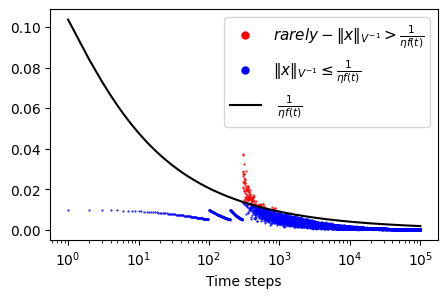

In [1]:
import numpy as np

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

norm = []
inv = []
borne = []

contexts = []

d = 10
n = 100000
Vinv = 0.01 * np.identity(d) 

for _ in range(1,n):
    
    if _>1:

        x = np.zeros((d,1))
        if _ < 100:
            idx = 0
            x[idx] = 1
        elif _>= 100 and _<200:
            idx = 1
            x[idx] = 1
        elif _>=200 and _<300:
            idx = 2
            x[idx] = 1
        else:
            x = np.random.uniform(0,1,d)
            x = x.reshape((d,1))

        # x = np.random.uniform(0,1,d)
        # x = x.reshape((d,1))

        low =  1 + x.T @ Vinv @ x  
        high =  Vinv @ x @ x.T @ Vinv 
        Vinv = Vinv - high / low

        val =  x.T @ Vinv @ x

        inv.append( val[0][0]  )

        rate = np.sqrt( 4 * 4* d**2 * 0.66 * (_**(2/3) ) * ( 1.01 * np.log(_) )**(1/3) )
        borne.append(  1 / rate )


import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(5, 3))

# plt.ylim(0,0.025 )

inv1 = [ i if i>=j else np.nan for i,j in zip(inv,borne)  ]
inv2 = [ i if i<j else np.nan for i,j in zip(inv,borne)  ]
plt.plot(range(1,n-1), inv1, '.', markersize = 1, color = 'red', label = r'$ rarely - \| x \|_{V^{-1}} > \frac{1}{\eta f(t)} $')
plt.plot(range(1,n-1), inv2, '.', markersize = 1, color = 'blue', label = r'$\| x \|_{V^{-1}} \leq \frac{1}{\eta f(t)} $')
plt.plot(range(1,n-1), borne, color = 'black', label = r' $\frac{1}{\eta f(t)} $' )
plt.legend(markerscale=10, fontsize = 11)
plt.xscale('log')
plt.xlabel('Time steps')

count_non_nan = np.count_nonzero(~np.isnan(inv1))

print(count_non_nan) 

# plt.savefig('./forced_exploration.png', bbox_inches='tight', dpi=300)

In [25]:
import games
game = games.label_efficient()
import randcbpside
alg = randcbpside.RandCPBside(game,2,100,1.01,1,1,10,10e-7)
alg.eta

Restricted license - for non-production use only - expires 2024-10-28


array([0.66666667, 0.        , 0.        ])

In [14]:
len(borne)

99998

In [15]:
len(inv)

99998

99941


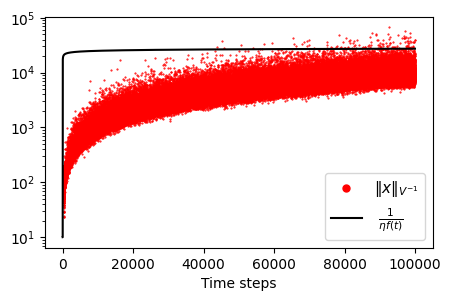

In [76]:
import numpy as np



def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

norm = []
inv = []
borne = []
borne2 = []

contexts = []

d = 10
n = 100000
Vinv = 0.01 * np.identity(d) 
V = 0.01 * np.identity(d)

for _ in range(n):

    x = np.zeros((d,1))
    if _ < 100:
        idx = 0
        x[idx] = 1
    elif _>= 100 and _<200:
        idx = 1
        x[idx] = 1
    elif _>=200 and _<300:
        idx = 2
        x[idx] = 1
    else:
        # idx = np.random.randint(0,d)
        # x[idx] = 1
        x = np.random.uniform(0,1,d)
        x = x.reshape((d,1))

    val =  x.T @ Vinv @ x
    val2 = x.T @ V @ x

    inv.append( 1 / val[0][0]  )
    norm.append( val2[0][0]  )

    low =  1 + x.T @ Vinv @ x  
    high =  Vinv @ x @ x.T @ Vinv 
    Vinv = Vinv - high / low

    V = V + x @ x.T

    if _>1:
        borne.append( 0.66 * (_**(2/3) ) * ( 1.01 * np.log(_) )**(1/3) )
        borne2.append( 0.01 / (4 * 0.66 * d * ( np.sqrt( d * np.log( _ ) + 2 * np.log(1/_**2) ) + 2  ) ) )
    else:
        borne.append(0.1)
        borne2.append(0.1)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(5, 3))

# plt.ylim(0,0.025 )

plt.plot(range(n), inv, '.', markersize = 1, color = 'red', label = r'$\| x \|_{V^{-1}} $')
# plt.plot(range(n), [ norm[i]  for i in range(n) ], '.', markersize = 1, color = 'green' )
plt.plot(range(n), 1/np.array(borne2), color = 'black', label = r' $\frac{1}{\eta f(t)} $' )
plt.legend(markerscale=10, fontsize = 11)
# plt.xscale('log')
plt.xlabel('Time steps')
plt.yscale('log')

count_non_nan = np.count_nonzero(~np.isnan(inv1))

print(count_non_nan) 

# plt.savefig('./forced_exploration.png', bbox_inches='tight', dpi=300)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

class Evaluation_contextual:

    def __init__(self, horizon, ):
        self.horizon = horizon

    def get_outcomes(self, game, ):
        outcomes = np.random.choice( game.n_outcomes , p= list( game.outcome_dist.values() ), size= self.horizon) 
        return outcomes

    def get_feedback(self, game, action, outcome):
        return game.FeedbackMatrix[ action ][ outcome ]

    def get_bandit_feedback(self, game, action, outcome):
        return game.banditFeedbackMatrix[ action ][ outcome ]

    def eval_policy_once(self, alg, game, job):

        distribution, context_generator, jobid = job

        np.random.seed(jobid)
        outcome_distribution =  {'spam':distribution[0],'ham':distribution[1]}
        game.set_outcome_distribution( outcome_distribution,jobid )

        outcomes = self.get_outcomes(game, )
        contexts = [ context_generator.get_context(outcome) for outcome in outcomes ]
        # context_generator.generate_unique_context()
        # contexts = [ context_generator.get_same_context(outcome) for outcome in outcomes ]
        
        if context_generator.type == 'polynomial':
            contexts = np.array(contexts).squeeze()
            contexts = PolynomialFeatures(6).fit_transform( contexts)
            contexts = contexts.tolist()
            dim = len(contexts[0])
            contexts = [ np.array(elmt).reshape( (dim,1) ) for elmt in contexts]

        cumRegret =  np.zeros(self.horizon, dtype =float)

        alg.reset()

        context_counter0 = np.ones(10)
        context_counter1 = np.ones(10)


        for t in range(self.horizon):



            

            outcome = outcomes[t]
            context = contexts[t]

        
            

            action = alg.get_action(t, context)
            
            feedback =  self.get_feedback( game, action, outcome )

            alg.update(action, feedback, outcome, t, context )
            
            regret = game.LossMatrix[action, outcome] - np.min( game.LossMatrix[...,outcome] )

            cumRegret[t] =  regret

            # index = np.where(context == 1)[0][0]
            # if action == 0:
            #     context_counter0[index] += 1
            # elif action ==1:
            #     context_counter1[index] += 1

            print(alg.n)
            # print(np.round(alg.contexts[0]['V_it_inv'],2) )
            # print(np.round(alg.contexts[1]['V_it_inv'],2) )
            print( np.trace( 1 / alg.contexts[1]['V_it_inv'] )  )
            

            # print(context_counter0)
            # print(np.round(1/context_counter0,2) ) 
            print(context_counter1)
            print(np.round(1/context_counter1,2) )
            print()

        return  np.cumsum( cumRegret ) 
    
import randcbpside
import games
import synthetic_data

# synthetic_data.OrthogonalContexts(d)
d = 10
n = 100
game = games.apple_tasting(False)
alg = randcbpside.RandCPBside(game, 28, n, 1.01, 0.01, 1, 10, 10e-7)
context_gen = synthetic_data.PolynomialContexts(2, 0.1)
job = [ np.array([0.2,0.8]), context_gen,  3]

eval = Evaluation_contextual(n)
regret = eval.eval_policy_once(alg, game, job)

[1. 0.]
28.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 1.]
28.948963041156155
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 2.]
29.70908220832674
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 3.]
30.836484077959966
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 4.]
31.961040851365073
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 5.]
32.672654003050674
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 6.]
33.54202828953045
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 7.]
33.88120664086399
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 8.]
35.13810264876268
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[1. 9.]
35.65412414745686
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[ 1. 10.]
36.769964849735025
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[ 1. 

/tmp/ipykernel_8004/2197561428.py:78: RuntimeWarning: divide by zero encountered in divide
  print( np.trace( 1 / alg.contexts[1]['V_it_inv'] )  )
